#  Importing the Necessary Library

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [16]:
df=pd.read_csv('anaemia_data.csv')

# Data Explorations and the initial Inspection

In [17]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.97,28.36,26.41,5.15,Yes
1,2,F,44.01,29.22,27.33,7.97,Yes
2,3,F,47.77,27.73,24.61,9.14,Yes
3,4,F,45.96,30.69,25.19,4.00,Yes
4,5,M,46.91,31.26,22.21,9.90,Yes


# Visualization of data shape

In [18]:
df.shape

(500, 7)

# INFORMATION

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


# Describing Summary of the Datasets

In [20]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.913580,29.349720,25.570440,10.893100
std,144.481833,2.950017,1.844623,2.215913,3.040943
min,1.000000,36.800000,24.150000,17.950000,4.000000
25%,125.750000,43.000000,28.130000,24.550000,8.920000
50%,250.500000,44.555000,29.480000,25.935000,9.950000
75%,375.250000,46.465000,30.692500,27.002500,13.330000
max,500.000000,56.850000,33.600000,31.300000,18.550000


In [21]:
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

# LISTING THE CATEGORICAL AND THE NUMERICAL COLUMNS

In [22]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

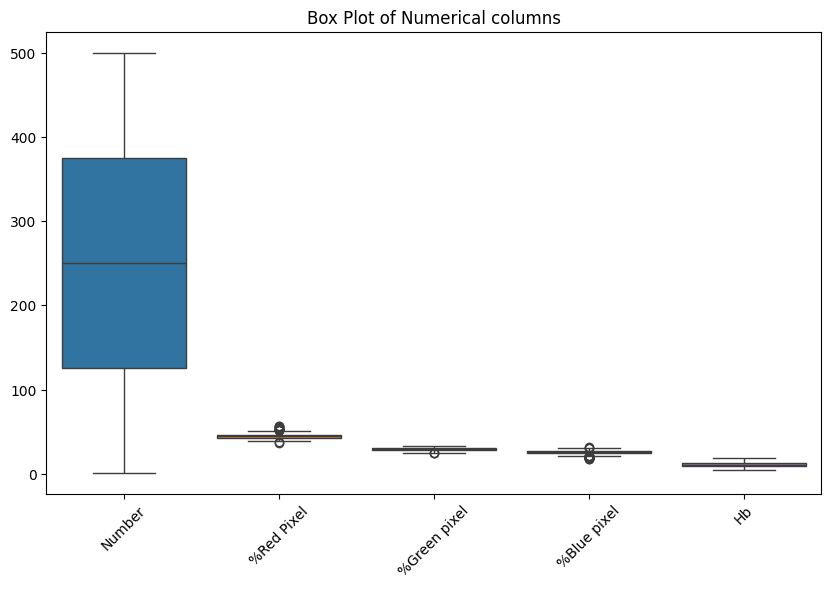

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical columns')
plt.show()

# TO DETERMINE WHETHER NUMERICAL COLUMNS FOLLOW A NORMAL DISTRIBUTION, YOU CAN PERFORM STATISTICAL TESTS OR VISUAL INSPECTIONS. NORMAL DISTRIBUTION, AKA GAUSSIAN DISTRIBUTION IS CHARACTERIZED BY BELL-SHAPED CURVE WHERE THE DATA CLUSTER AROUND THE MEAN, WITH THE MOST VALUES CLOSE TO THE MEAN AND FEWER VALUES FARTHER AWAY

In [24]:
import scipy.stats as stats

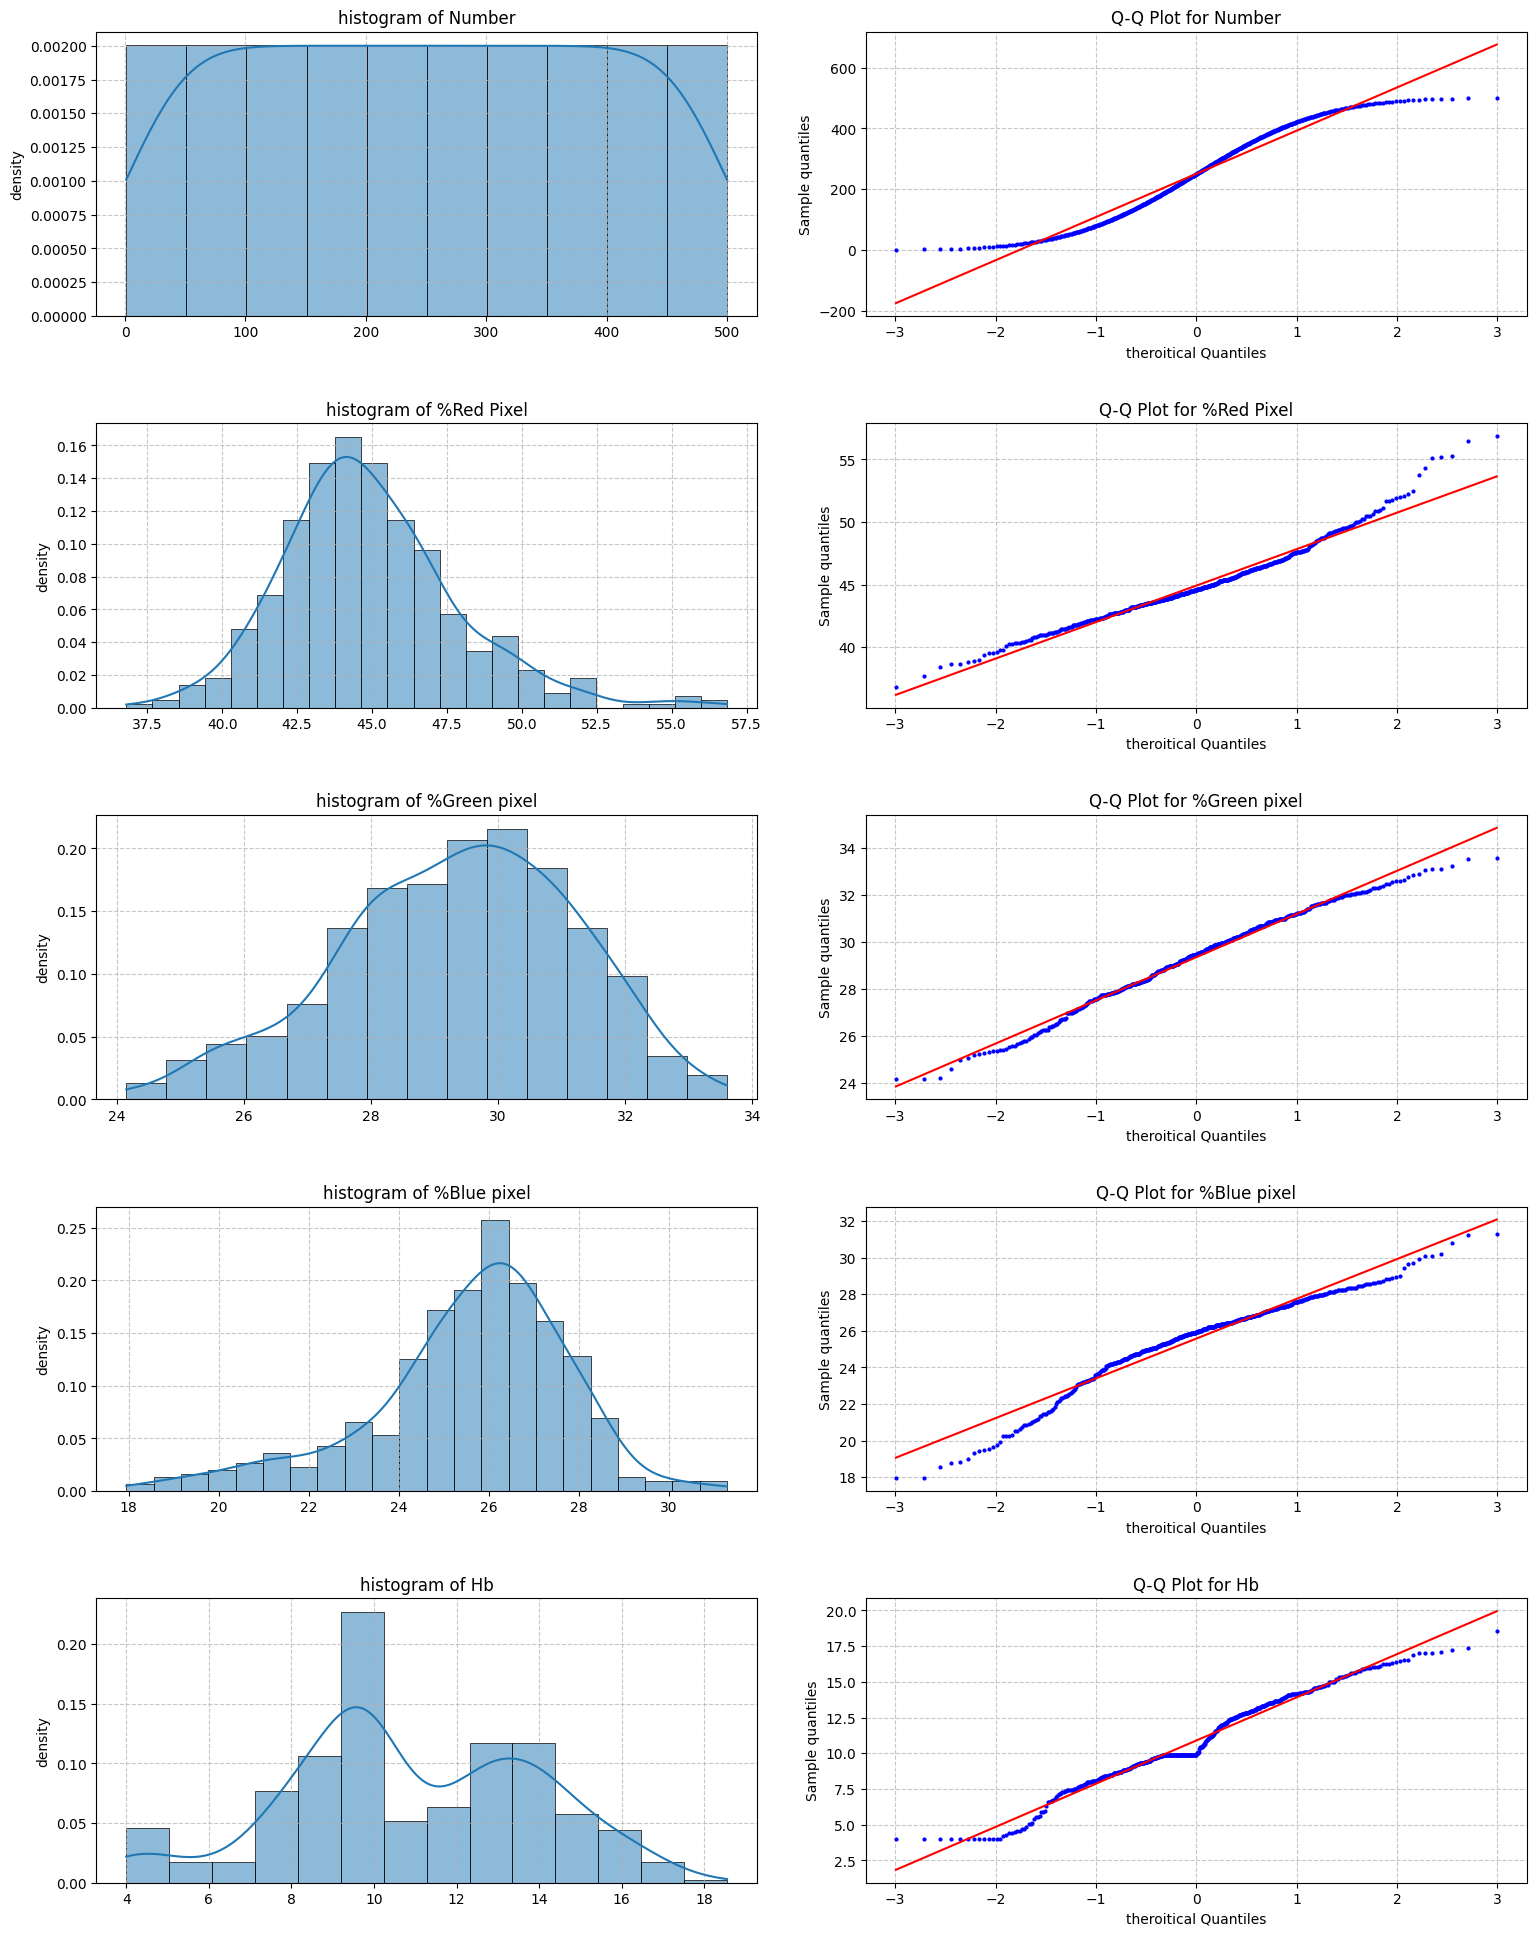

In [25]:
#create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols*4))

#plotting histograms and Q-Q plots for each umerical column
for i,col in enumerate(numerical_columns):
    #histogram on the left subplot
    sns.histplot(df[col],kde=True ,ax=axes[i,0], stat='density', linewidth = 0.5)
    axes[i , 0].set_title(f'histogram of {col}') 
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('density')
    axes[i,0].grid(True, linestyle='--',alpha=0.7)

    #Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i,1], dist='norm', fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0) # adjust marker size for clarity
    axes[i,1].grid(True, linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot for {col}')
    axes[i,1].set_xlabel('theroitical Quantiles')
    axes[i,1].set_ylabel('Sample quantiles')

#adjust layout and display display the plots
plt.tight_layout(pad=3.0)
plt.show()

    

In [30]:
!pip install statsmodels

  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors  # Corrected import


# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
    
    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
    
    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')


# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    
    print('\n')


# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)

Column: Number
Shapiro-Wilk Test: Statistics=0.955, p-value=0.000
Shapiro-Wilk Test: Number does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=5.526
Anderson-Darling Test: Critical Values: [0.571 0.651 0.781 0.911 1.083]
Anderson-Darling Test: Number does not look normally distributed (reject H0)
Jarque-Bera Test: JB statistic=30.000, p-value=0.000
Jarque-Bera Test: Number does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=317.444, p-value=0.000
D'Agostino and Pearson's Test: Number does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=0.995, p-value=0.000
Kolmogorov-Smirnov Test: Number does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.058, p-value=0.001
Lilliefors Test: Number does not look normally distributed (reject H0)


Column: %Red Pixel
Shapiro-Wilk Test: Statistics=0.970, p-value=0.000
Shapiro-Wilk Test: %Red Pixel does not look normally distributed (r

# COLUMN TO DETECT OUTLIERS


In [32]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q1+1.5*IQR
            col_outliers_mask=(data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #True if any outliers detected
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method: ")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method: 
Number:False
Sex:True
%Red Pixel:True
%Green pixel:True
%Blue pixel:True
Hb:True
Anaemic:True


In [ ]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")


Outliers detected using Z-score method:
Number: False
Sex: True
%Red Pixel: True
%Green pixel: False
%Blue pixel: True
Hb: False
Anaemic: True


# Explanatory Data Analysis

In [33]:
numeric_data=df[numerical_columns]
# Compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()

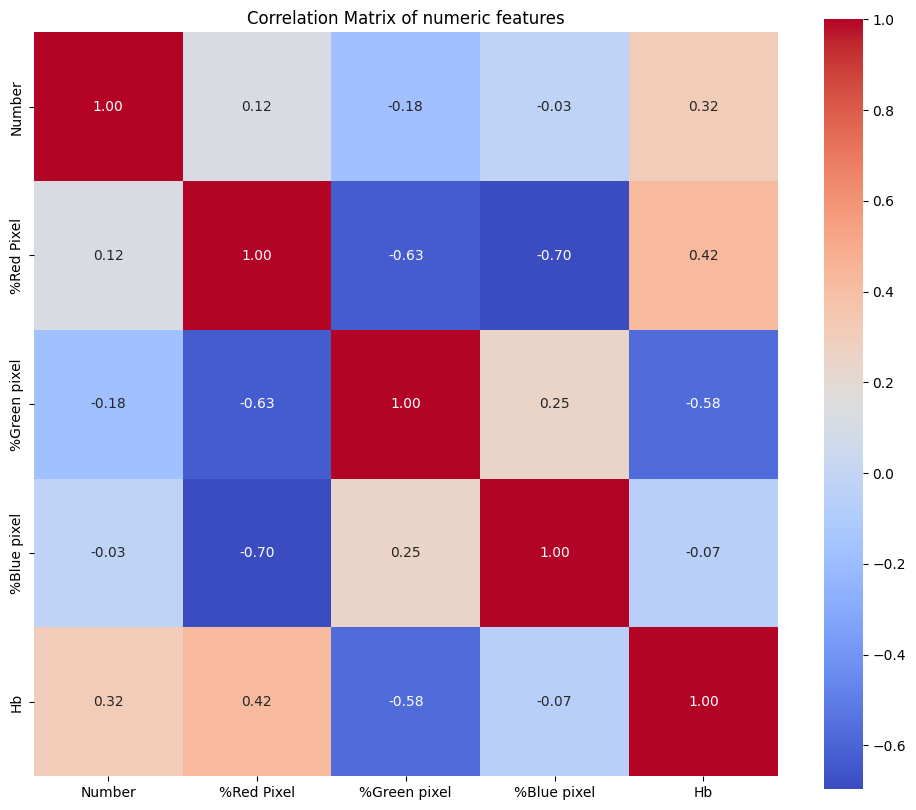

In [34]:
#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix of numeric features')
plt.show()

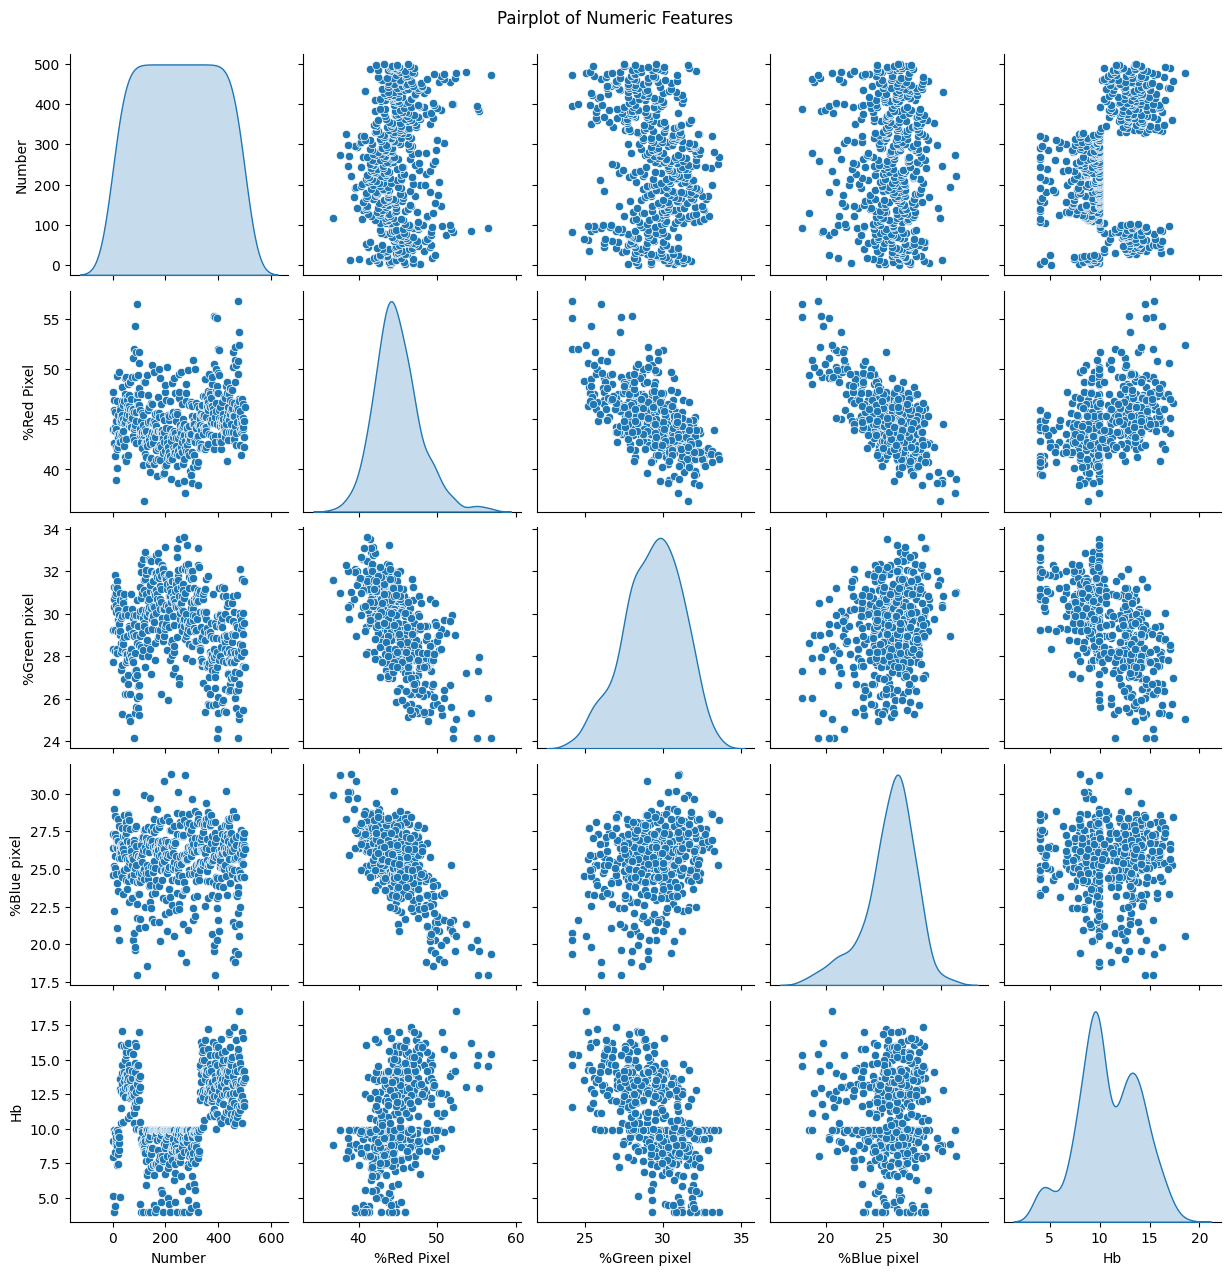

In [35]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

In [36]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.97,28.36,26.41,5.15,Yes
1,2,F,44.01,29.22,27.33,7.97,Yes
2,3,F,47.77,27.73,24.61,9.14,Yes
3,4,F,45.96,30.69,25.19,4.00,Yes
4,5,M,46.91,31.26,22.21,9.90,Yes


In [37]:
print(list(df.columns))

['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic']


In [38]:
df.to_csv('filtereddata.csv',index=False)

# Loading and Working with the Filtered Datasets and Analysis of the data

In [39]:
import pandas as pd
data=pd.read_csv('filtereddata.csv')
data.head(60)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.97,28.36,26.41,5.15,Yes
1,2,F,44.01,29.22,27.33,7.97,Yes
2,3,F,47.77,27.73,24.61,9.14,Yes
3,4,F,45.96,30.69,25.19,4.00,Yes
4,5,M,46.91,31.26,22.21,9.90,Yes
5,6,F,42.65,30.32,28.97,9.90,Yes
6,7,F,44.21,29.22,25.05,8.31,Yes
7,8,F,43.83,30.88,27.35,9.77,Yes
8,9,M,45.76,28.26,25.87,9.68,Yes
9,10,M,41.34,31.81,28.50,4.42,Yes


In [40]:
#display the first few rows and all columns
pd.set_option('display.max_columns',None) #
print("First few rows of data: ")
print(data.head())

First few rows of data: 
   Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M       43.97         28.36        26.41  5.15     Yes
1       2   F       44.01         29.22        27.33  7.97     Yes
2       3   F       47.77         27.73        24.61  9.14     Yes
3       4   F       45.96         30.69        25.19  4.00     Yes
4       5  M        46.91         31.26        22.21  9.90     Yes


In [41]:
data.drop(columns=['Number'],axis=1,inplace=True)
data.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.97,28.36,26.41,5.15,Yes
1,F,44.01,29.22,27.33,7.97,Yes
2,F,47.77,27.73,24.61,9.14,Yes
3,F,45.96,30.69,25.19,4.00,Yes
4,M,46.91,31.26,22.21,9.90,Yes


In [42]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns
numerical_cols

Index(['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb'], dtype='object')

In [43]:
category_cols

Index(['Sex', 'Anaemic'], dtype='object')

# ONE-HOT ENCODING TO THE CATEGORICAL DATA

In [61]:
# Standardize the 'Sex' column values
data_categorical['Sex'] = data_categorical['Sex'].str.strip().str.lower()

# Check unique values again
unique_values_cleaned = data_categorical['Sex'].unique()
print(unique_values_cleaned)

# Perform one-hot encoding on the cleaned 'Sex' column
encoded_data = pd.get_dummies(data_categorical, columns=['Sex'])

# Display the first few rows of the encoded DataFrame
encoded_data.head()

['m' 'f']


,Anaemic,Sex_f,Sex_m
0,Yes,False,True
1,Yes,True,False
2,Yes,True,False
3,Yes,True,False
4,Yes,False,True


# CHANGING NUMERICAL COLUMNS TO STANDARD SCALAR VALUE

In [ ]:
!pip install Scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#Assuming encoded_data is already created from one-hot encoding
#numerical-cols should be defined earlier as numerical columns from the dataset
#Pipeline for numerical columns
numerical_pipeline=Pipeline([('scaler',StandardScaler())])
#Transform numerical columns
numerical_data=numerical_pipeline.fit_transform(data[numerical_cols])
#Convert transformed numerical data back to Dataframe
numerical_data_df=pd.DataFrame(numerical_data,columns=numerical_cols)
#Combine numerical and categorical data
final_data = pd.concat([encoded_data, numerical_data_df], axis=1)
#Now final_data contains all your processed data ready for modeling

In [63]:
final_data.head()

,Anaemic,Sex_f,Sex_m,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,Yes,False,True,-0.320176,-0.537080,0.379257,-1.890483
1,Yes,True,False,-0.306603,-0.070394,0.794852,-0.962211
2,Yes,True,False,0.969242,-0.878956,-0.433863,-0.577076
3,Yes,True,False,0.355072,0.727315,-0.171857,-2.269034
4,Yes,False,True,0.677426,1.036631,-1.518022,-0.326903


# IMPLEMENTING DECISION TREE

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
import os
import joblib #For saving the model
#Extra feature(x) and target variable(y)
X=final_data.drop('Anaemic',axis=1)
y=final_data['Anaemic']
#convert target variable to numerical(0 and 1)
y=y.map({'No': 0, 'Yes': 1})
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize logistic regression model
model = LogisticRegression()

In [65]:
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[63  0]
 [ 0 37]]


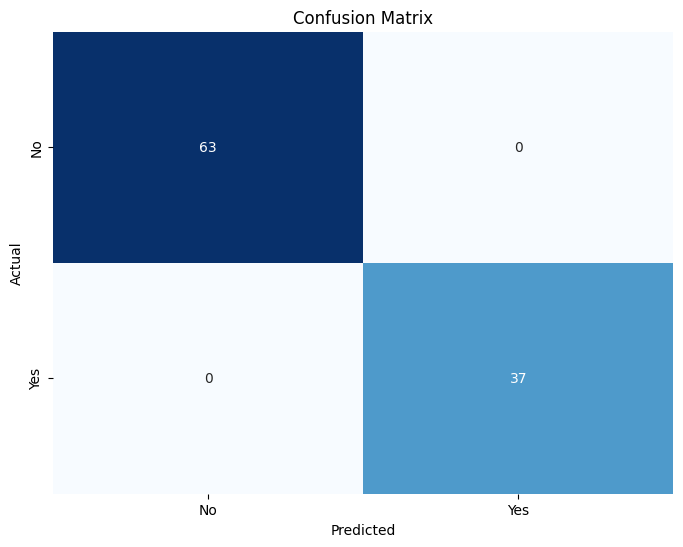

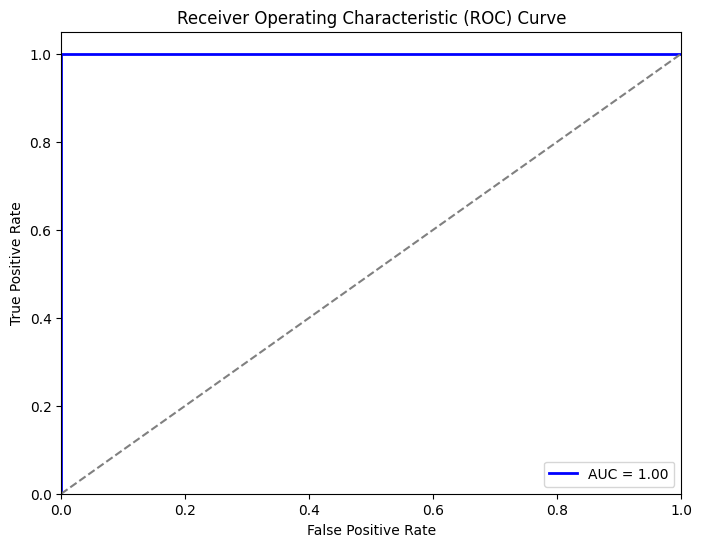

Model saved at MODELS/decisiontree_model.pkl


In [66]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('MODELS'):
    os.makedirs('MODELS')

model_path = 'MODELS/decisiontree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


# RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [68]:
# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)


In [69]:
# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [71]:
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')


Training Accuracy: 1.00
Testing Accuracy: 0.99


In [72]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[62  1]
 [ 0 37]]


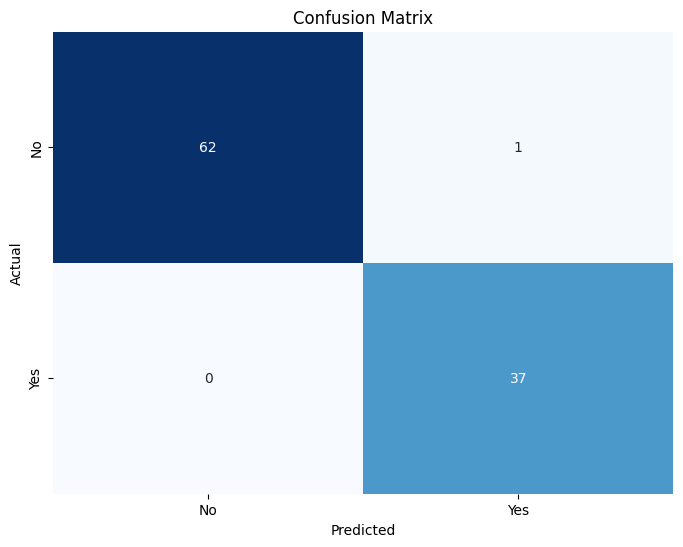

In [73]:
# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

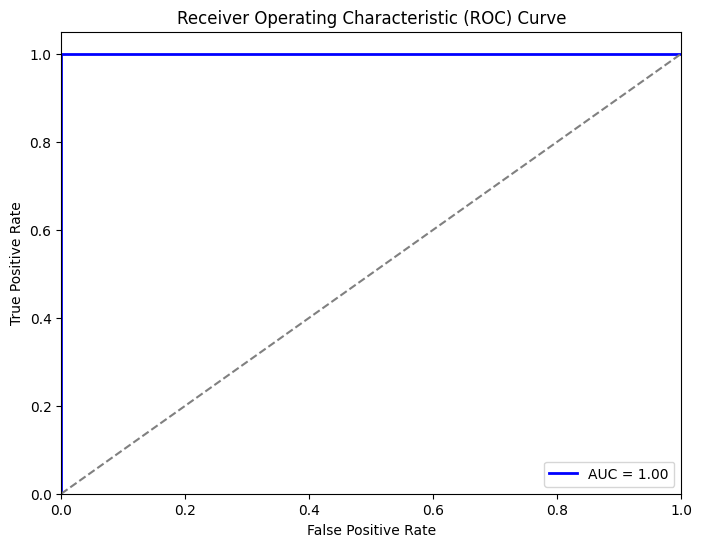

In [75]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [76]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('MODELS'):
    os.makedirs('MODELS')

model_path = 'MODELS/randomforest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at MODELS/randomforest_model.pkl


# KNN

Training Accuracy: 0.97
Testing Accuracy: 0.92
Confusion Matrix:
[[55  8]
 [ 0 37]]


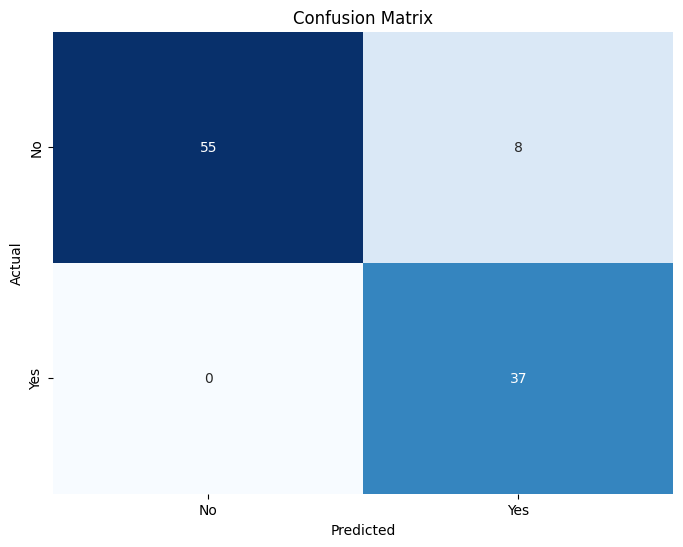

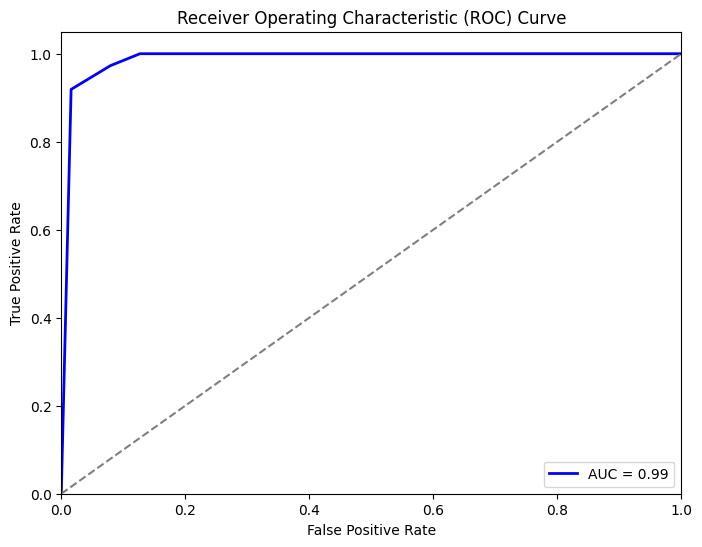

Model saved at MODELS/knn_model.pkl


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model




# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)





# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('MODELS'):
    os.makedirs('MODELS')

model_path = 'MODELS/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


# NAIVE BAYES

Training Accuracy: 0.93
Testing Accuracy: 0.94
Confusion Matrix:
[[57  6]
 [ 0 37]]


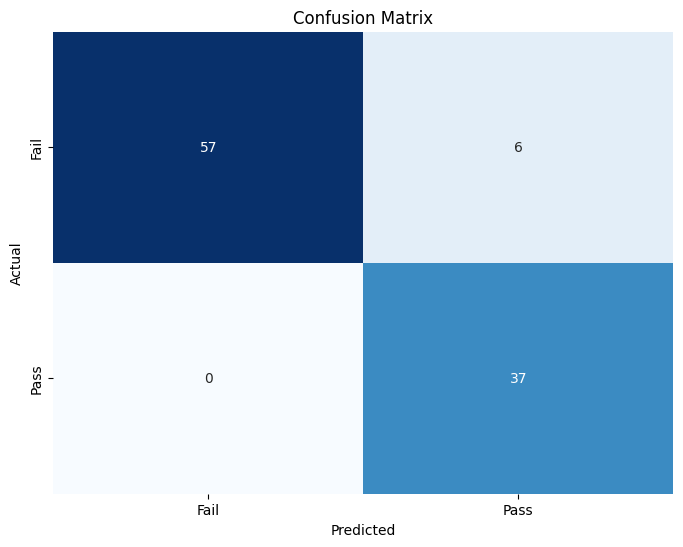

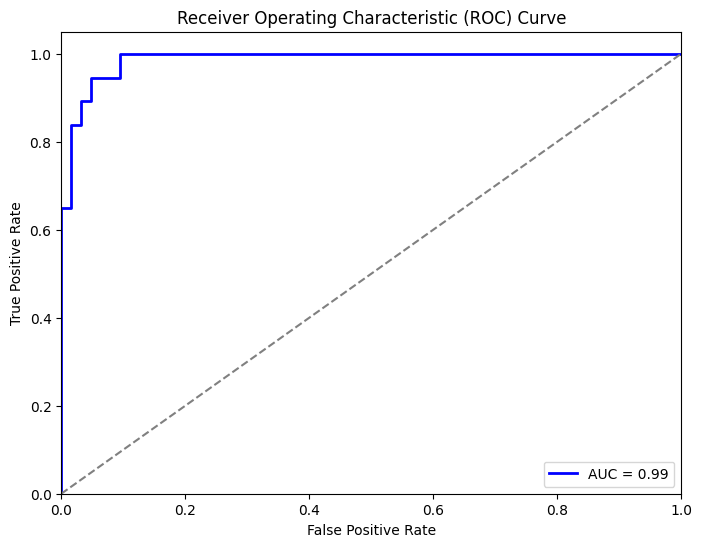

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model




# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)






# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [79]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('MODELS'):
    os.makedirs('MODELS')

model_path = 'MODELS/naive_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


Model saved at MODELS/naive_model.pkl
